# Research question 1:

### Is there a correlation between the frequency of social media use and loneliness?

I want to explore whether there is a correlation between the frequency of social media use and self-reported loneliness.


Is there a population parameter that you would like to estimate? Are you interested in the association of one (or more) variables on some outcome?

I am interested in estimating the population parameters of the regression slope and the intercept. 


## Variables: (why choose these varibales( What plots/visualizations or summary statistics might be useful?))


### 1.CONNECTION_social_media_visits_per_day:

- this variable reflect media usage and this is a categorical variable with categories ranging from "Less than once per day" to "More than 15 times per day."

- I will convert this categorical data into numerical data by randomly choosing a number in this category (such as choose 3 in the frequency level of 1-3 times per day.)
And then I can use boxplot to visulize data under the lonley_direct category.


###  2. LONELY_direct:

- this variable is also a cateforical variable. It can reflect lonliness, so i choose this variable. It has responses such as "None of the time", and "All of the time."

- We can use bar chart to show the distribution of social media usage frequency to understand the usage habits of most participants.

- I will combine the categorical data of LONELY_direct and numerical data on the box plot to visualize the relationship between lonley_direct and CONNECTION_social_media_visits_per_day.


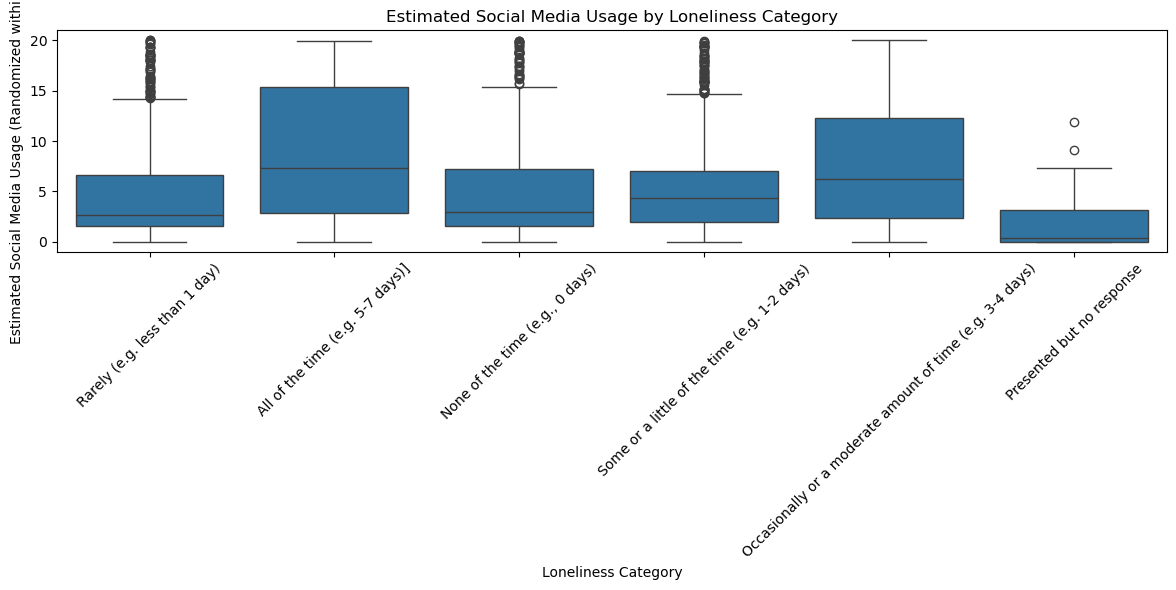

In [37]:
## Example: Box plot visulization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("CSCS_data_anon (1).csv", low_memory=False)
data_subset = data[['LONELY_direct', 'CONNECTION_social_media_visits_per_day']].dropna()

# Define ranges for each social media usage category
category_ranges = {
    'Less than once per day': (0, 1),
    '1-3 times per day': (1, 3),
    '4-8 times per day': (4, 8),
    '9-15 times per day': (9, 15),
    'More than 15 times per day': (15, 20)
}

def random_within_range(category):
    low, high = category_ranges.get(category, (0, 0))
    return np.random.uniform(low, high)

# Apply random sampling to create a new numerical column for social media usage
data_subset['Social_Media_Usage_Numeric'] = data_subset['CONNECTION_social_media_visits_per_day'].apply(random_within_range)

# Drop NaNs if any exist after transformation
data_subset = data_subset.dropna(subset=['Social_Media_Usage_Numeric', 'LONELY_direct'])

# Plotting: Box plot for social media usage within each loneliness category
plt.figure(figsize=(12, 6))
sns.boxplot(x='LONELY_direct', y='Social_Media_Usage_Numeric', data=data_subset)
plt.title("Estimated Social Media Usage by Loneliness Category")
plt.xlabel("Loneliness Category")
plt.ylabel("Estimated Social Media Usage (Randomized within Range)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As the boxplot show above, we can visualize social media usage levels across different self-reported loneliness categories. 

### Further analysis plan to perform:
 1. convert the level of the category of LONELY_direct to numerical scales(turn into numerical data, so we can meke linear regresstion)
   Delete all rows with NAN in the three variables to ensure accuracy
   Group the data based on different age groups, calculate the mean and standard deviation of social media usage frequency and loneliness in different groups. (help reflect the average levels and the variation in these responses.)
    
### Assumption:
- assume if a relationship exists between LONELY_direct and CONNECTION_social_media_visits_per_day, it is a linear association. 

- Also, assume each observations are independent, which mwans that in observations are also independent. This assumption can ensure that our analysis is reliable.

### Linear regression
- use LONELY_direct as the independent variable (x-axis) and CONNECTION_social_media_visits_per_day as the dependent variable (y-axis). 
- we performed a simple linear regression to model the relationship between social media use and loneliness. Also, we create a scatter plot displaying the relationship between 'LONELY_direct' and 'CONNECTION_social_media_visits_per_day', overlaid with the linear regression line. It allows us to visually assess whether there is a positive, negative, or no correlation between the two variables.

### hypothesize on what you would expect to see：
There was a positive correlation between social media use and life satisfaction and loneliness. 

### how these results would be relevant in answering your research question
### CONNECTION_social_media_visits_per_day = LONELY_direct * b +a 
IF the regression line is not approach to horizontal,  If the regression line is not close to horizontal, and if the scatter plot shows a pattern with points concentrating around the line, this would suggest a potential linear association between social media usage and loneliness. 
Also, If the regression coefficient b for social media usage is positive, this would indicate that as social media use increases, loneliness scores tend to increase.


## Research question 2: 
### Does the age distribution of individuals in this dataset indicate a trend toward an aging population?
Since we do not have different year's aging distribution change, so we only aim to understand whether the dataset shows a concentration of individuals in older age groups, suggesting a demographic shift toward an aging population.

## Variables: (why choose these varibales( What plots/visualizations or summary statistics might be useful?))

### 1.Demo_age: 
- This is a continous data. It allowed me to observe distribution of different age groups. Also, I choose this variable because it is a basic data on population, studying its distribution help me to identify demographic trends.

- Since this variable is a continous data, so we can use histagrams to check whether there is any skewness, This provides a visual look at the age distribution, showing where most individuals fall across age groups.

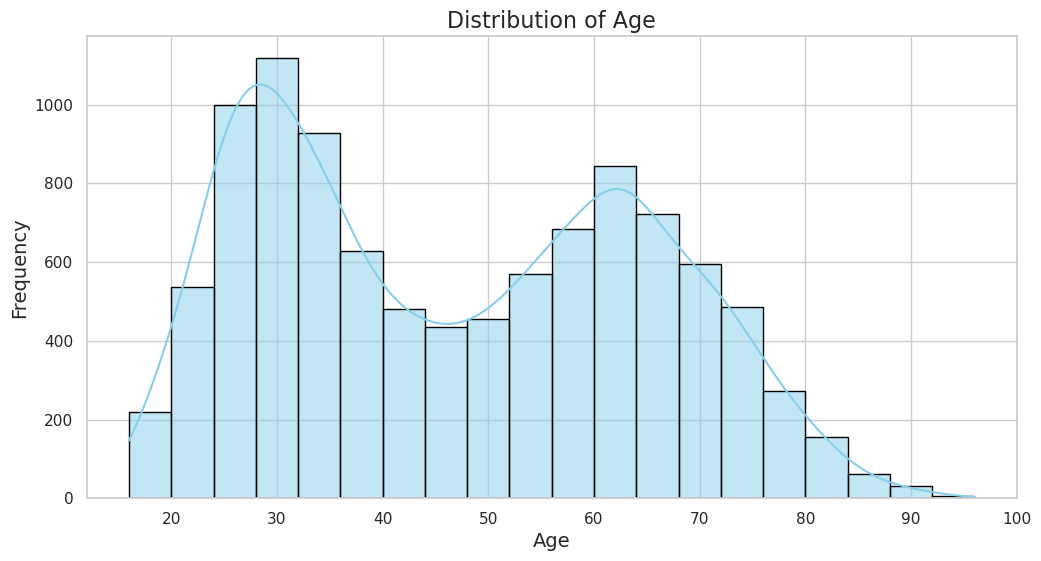

In [14]:
data = pd.read_csv("CSCS_data_anon (1).csv", low_memory=False)

# Extract the 'DEMO_age' column and drop NaN values
age_data = data['DEMO_age'].dropna()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Histogram with KDE overlay
sns.histplot(age_data, bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

## Further analysis plan to perform:

### assumption: the  dataset is assumed to be large enough to represent a very broad popultation across Canada
- I plan to further develop data visualization using a boxplot of DEMO_age. This boxplot will display the interquartile range, median, and any outliers, providing deeper insights into the age distribution and revealing whether there is a concentration at certain age limits, and central tendency.  Also, it helps identify skewness and outliers across different age ranges. This is helful for assessing potential aging trends in the data and understanding the demographic distribution.

### hypothesis:
- I expect that if the dataset is skewed towards older age groups, this will manifest as higher median and mean ages, and possibly a right-skewed histogram (showing more individuals in the older age groups). 
### how these results would be relevant in answering your research question
- A right-skewed distribution and central tendency indicators that lean towards older age groups.
- since we can check the percentage of younger teenagers and the people who is more than 60 years old, this may support that there is a trend toward aging population 


## Research question 3:  Do older age groups report higher levels of loneliness compared to younger age groups?

I am interested in explore whether older individuals tend to report higher levels of loneliness compared to younger individuals, and the paremter i want to esitmate is the population proportion of individuals reporting high levels of loneliness

## Variables: (why choose these varibales( What plots/visualizations or summary statistics might be useful?))
1.Demo_age: 
- divide the age of people into 2 groups, which divided people into young and elder group. The summary statistics about the number of people stay in those two groups may be useful, because i need to calculate the proportion of different group people later. 
- I choose this variable because I want to compare elder age group and yonger group's lonliness level
2. LONELY_direct:
- I chosse this variable because i want to check elder's lonliness level. And in terms of visuliztion this variable, I will use the bar chart to show participant's lonliness level frequency.

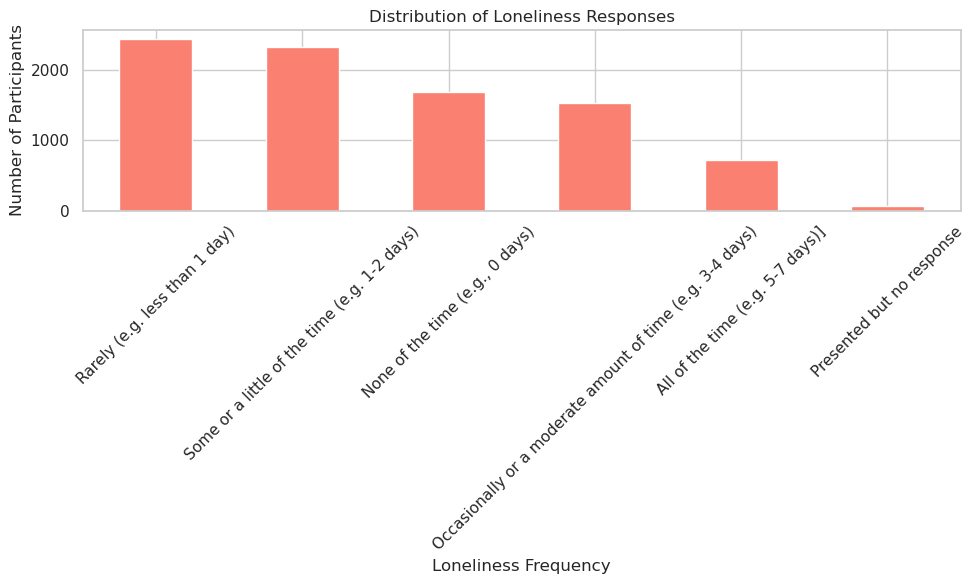

In [7]:
# Select the 'LONELY_direct' column
loneliness_responses = data['LONELY_direct']
loneliness_responses = loneliness_responses.dropna()
# Count the occurrences of each category in loneliness responses
loneliness_counts = loneliness_responses.value_counts()
# Plot the bar chart
plt.figure(figsize=(10, 6))
loneliness_counts.plot(kind='bar', color='salmon')
plt.title("Distribution of Loneliness Responses")
plt.xlabel("Loneliness Frequency")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above is Bar Chart for Loneliness Levels by Age Group: A bar chart showing the proportion of each loneliness level within each age group can reveal if certain age groups have a higher incidence of loneliness.

I will later further seperate these six categories into 2 categories, high and low. 

### Further analysis plan to perform:
### Assumption: We assume that all collected data are representative of the broad population, becuase this ensures that the bootstrapped confidence intervals are meaningful.
1. Calculate the proportion of people reporting two level (high and low) of loneliness within two age group.
2. Use bootstrapped confidence intervals for these proportions.(estimate the confidence intervals for the proportions of high loneliness in each age group)
- repeatedly take samples from each age group’s is_high_loneliness data.
- For each resample, we calculate the proportion of participants reporting high loneliness.
- After doing this many times, find 2.5% and 97.5% to get the confidence interval.

/tmp/ipykernel_103/347087059.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Elder', 'Younger'], y=group_counts['proportion'], palette='viridis')
/tmp/ipykernel_103/347087059.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.errorbar(x=[0, 1], y=group_counts['proportion'], yerr=[[group_counts['proportion'][0] - ci_elder[0], group_counts['proportion'][1] - ci_younger[0]], [ci_elder[1] - group_counts['proportion'][0], ci_younger[1] - group_counts['proportion'][1]]], fmt='none', c='black', capsize=5)


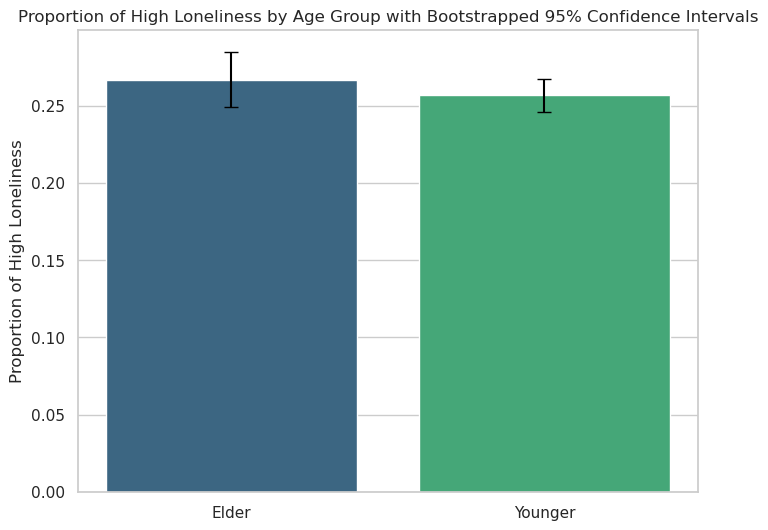

Elder Age Group 95% CI: (0.24884985361773318, 0.2848285236302802)
Younger Age Group 95% CI: (0.2456361346050027, 0.2670505668526183)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("CSCS_data_anon (1).csv", low_memory=False)
data_subset = data[['DEMO_age', 'LONELY_direct']].dropna()

# Define age groups and high loneliness
data_subset['age_group'] = np.where(data_subset['DEMO_age'] >= 60, 'Elder', 'Younger')
high_loneliness_levels = ['Occasionally or a moderate amount of time (e.g. 3-4 days)', 'All of the time (e.g. 5-7 days)]']
data_subset['is_high_loneliness'] = data_subset['LONELY_direct'].isin(high_loneliness_levels).astype(int)

# Calculate proportions for each group
group_counts = data_subset.groupby('age_group')['is_high_loneliness'].agg(['sum', 'count'])
group_counts['proportion'] = group_counts['sum'] / group_counts['count']

# Bootstrap confidence intervals
def bootstrap_ci(data, n_resamples=1000, confidence_level=0.95):
    proportions = []
    for _ in range(n_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)
        proportions.append(np.mean(resample))
    lower_bound = np.percentile(proportions, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(proportions, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

# Calculate confidence intervals for each group
ci_elder = bootstrap_ci(data_subset[data_subset['age_group'] == 'Elder']['is_high_loneliness'].values)
ci_younger = bootstrap_ci(data_subset[data_subset['age_group'] == 'Younger']['is_high_loneliness'].values)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=['Elder', 'Younger'], y=group_counts['proportion'], palette='viridis')
plt.errorbar(x=[0, 1], y=group_counts['proportion'], yerr=[[group_counts['proportion'][0] - ci_elder[0], group_counts['proportion'][1] - ci_younger[0]], [ci_elder[1] - group_counts['proportion'][0], ci_younger[1] - group_counts['proportion'][1]]], fmt='none', c='black', capsize=5)
plt.title('Proportion of High Loneliness by Age Group with Bootstrapped 95% Confidence Intervals')
plt.ylabel('Proportion of High Loneliness')
plt.show()

# Display confidence intervals
print("Elder Age Group 95% CI:", ci_elder)
print("Younger Age Group 95% CI:", ci_younger)

## Hypothesis & how these results would be relevant in answering your research question:
My hypothesis is that older people report higher levels of loneliness than younger people. By calculating the confidence intervals for the proportion of high loneliness within each age group, we can more accurately assess whether older people report significantly higher levels of loneliness than younger people. From the boxplots above, we can observe that the confidence intervals for loneliness across age groups do not overlap, indicating that age may be associated with loneliness levels.